# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import plotly.express as px
import scipy
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import pylab
import sympy as sym
import math
alg_dict = {
        2: "Insertion Sort",
        3: "Bucket Sort",
        8: "Quick Sort",
        5: "Cudi Sort",
        6: "Hybrid Sort",
        7: "Modified Bucket Sort"
    }
label = {
    "Percent_Sort": "Degree of Sortedness",
    "Size": "Array Size",
    "Seconds": "Sort Time in Seconds",
    "Ticks": "Clock Ticks",
    "Memory": "Memory Used"
}
base = [2,3,8]
imp = [6,7]
all = [2,3,8,6,7]

# Helper Functions

In [2]:
"""
Creates cleaned data frame from passed csv
"""
def create_df(csv):
    df = pd.read_csv(csv)
    df = df.rename(columns={'Unnamed: 0' :'Size','Unnamed: 1':'Ticks', 'Unnamed: 2': 'Seconds', 'Unnamed: 3' : 'Memory', 'Unnamed: 4' :'Percent_Sort','Unnamed: 5': 'Algorithm'})
    df = df.dropna()
    df = df.abs()
    return df

In [3]:
"""
Creates specific data frames
"""
def spec_data(df, alg, size, degree):
    new_df = df[df['Algorithm']==alg]
    new_df = new_df[new_df['Size'] < size]
    new_df = new_df[new_df['Percent_Sort'] == degree]
    return new_df

In [4]:
"""
Plots data frames
"""
def plot(x_axis, y_axis, low, high, *algs):
    lines = {}
    colors = ["r", "b", "g", "c", "y"]
    counter = 0
    plt.xlabel(label[x_axis])
    plt.ylabel(label[y_axis])
    myline = np.linspace(low, high)
    for alg in algs:
        x,y = (alg[x_axis].values, alg[y_axis].values)
        line = np.poly1d(np.polyfit(x,y,2))
        lines[alg_dict[alg["Algorithm"].iat[0]]] = line
    for l in lines:
        plt.plot(myline, lines[l](myline), colors[counter], label=l)
        print(f'{l}:\n', lines[l])
        counter += 1
    plt.legend(loc="upper left")
    plt.show()

In [5]:
def findIntersection(fun1,fun2,x0): 
    y, info, ier, msg = fsolve(lambda x : fun1(x) - fun2(x),x0, full_output=True)
    if ier != 1:
        return msg
    return y

# Data Frames

In [6]:
"""
Old Data (Flawed Hybrid Sort and Modified Bucket Sort)
"""
old_s = create_df("hs_mbs.csv")
old_m = create_df("hs_mbs_m.csv")
old_l = create_df("hs_mbs_l.csv")
old_data = pd.concat([old_s, old_m, old_l], axis = 0)

In [7]:
"""
New Data (Improved Partition)
"""
data_s = create_df("master_s.csv")
data_m = create_df("master_m.csv")
data_l = create_df("master_l.csv")
data_q = create_df("quicksort.csv")
data_hb = create_df("hs_mbs_new.csv")
data_c = create_df("cudi.csv")
data_b = create_df("bucket.csv")
data = pd.concat([data_s, data_m, data_l, data_q, data_hb, data_c], axis=0)
data = data[data.Algorithm != 3]
data = pd.concat([data, data_b], axis=0)
data.head(5)

,Size,Ticks,Seconds,Memory,Percent_Sort,Algorithm
0,789.0,898.0,0.000898,3156.0,0.0,2.0
2,895.0,1194.0,0.001194,3580.0,0.0,2.0
4,625.0,461.0,0.000461,2500.0,0.0,2.0
6,968.0,724.0,0.000724,3872.0,0.0,2.0
8,189.0,33.0,0.000033,756.0,0.0,2.0


In [8]:
"""
Degree Data
"""
deg_data = create_df("degree.csv")

# Data Plots

## Base Alg, n < 1000

Bucket Sort:
            2
3.532e-10 x + 4.295e-08 x + 5.144e-06
Quick Sort:
            2
4.478e-11 x + 1.026e-07 x + 8.083e-07


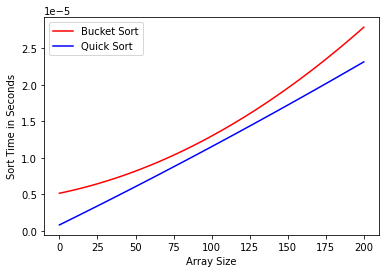

Bucket Sort:
            2
1.074e-10 x + 8.551e-08 x + 4.136e-06
Quick Sort:
            2
9.328e-11 x + 9.176e-08 x + 1.131e-06


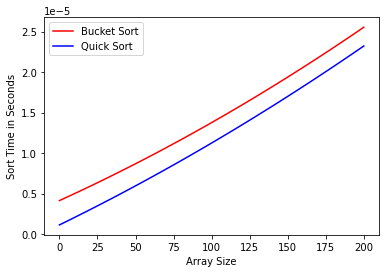

Bucket Sort:
            2
3.007e-10 x + 5.206e-08 x + 4.653e-06
Quick Sort:
            2
7.544e-11 x + 9.629e-08 x + 1.117e-06


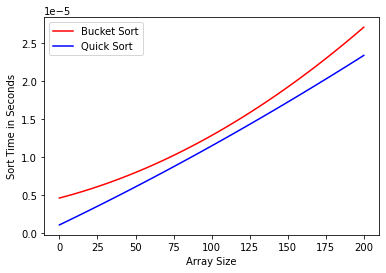

Bucket Sort:
            2
5.486e-11 x + 9.616e-08 x + 3.344e-06
Quick Sort:
            2
7.046e-11 x + 9.804e-08 x + 1.004e-06


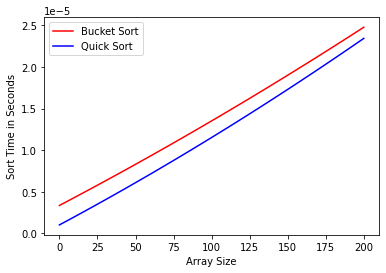

Bucket Sort:
             2
-1.125e-10 x + 7.881e-08 x + 3.601e-06
Quick Sort:
            2
3.504e-09 x + 3.974e-08 x + 1.528e-06


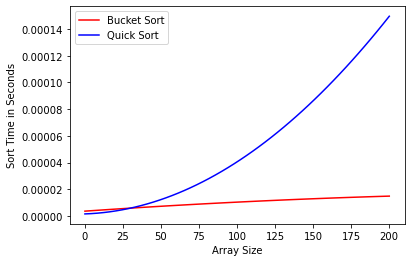

In [9]:
degree = 0
floor = 0
ceil = 200
while(degree <= 100):
    #i = spec_data(data,2,ceil,degree)
    b = spec_data(data,3,ceil,degree)
    q = spec_data(data, 8,ceil,degree)
    plot("Size", "Seconds", floor, ceil,  b, q)
    degree += 25

## Base Alg, n < 10 000

Insertion Sort:
            2
6.513e-10 x + 5.112e-08 x - 1.168e-05
Bucket Sort:
            2
4.084e-12 x + 9.957e-08 x - 3.408e-07
Quick Sort:
            2
1.843e-12 x + 1.497e-07 x - 1.271e-05


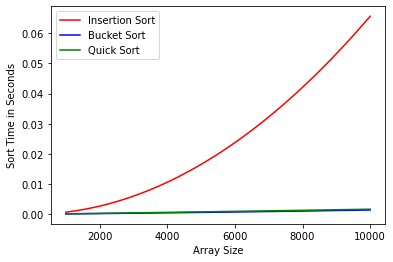

Insertion Sort:
            2
6.466e-10 x + 7.166e-08 x - 2.341e-05
Bucket Sort:
           2
4.16e-12 x + 9.862e-08 x - 1.336e-06
Quick Sort:
            2
2.038e-12 x + 1.488e-07 x - 1.163e-05


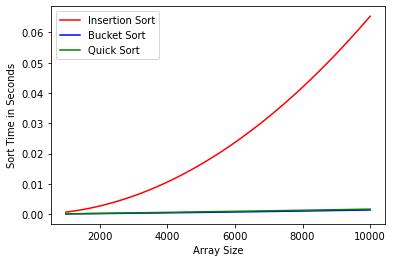

Insertion Sort:
            2
6.483e-10 x + 5.612e-08 x - 1.141e-05
Bucket Sort:
            2
4.098e-12 x + 9.646e-08 x - 1.218e-06
Quick Sort:
            2
1.925e-12 x + 1.492e-07 x - 1.179e-05


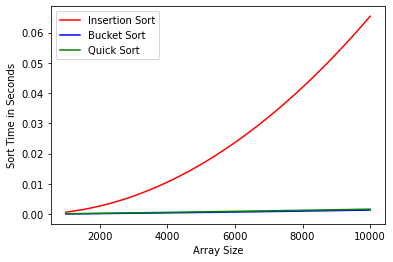

Insertion Sort:
           2
6.49e-10 x + 7.68e-08 x - 2.807e-05
Bucket Sort:
            2
4.189e-12 x + 9.637e-08 x + 6.416e-07
Quick Sort:
            2
2.137e-12 x + 1.474e-07 x - 1.095e-05


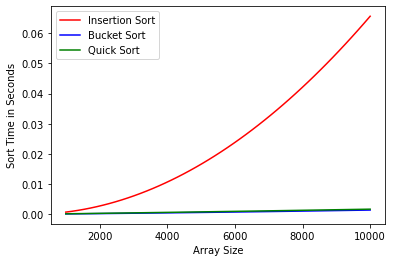

Insertion Sort:
             2
-2.764e-14 x + 6.095e-09 x + 9.094e-07
Bucket Sort:
            2
3.886e-12 x + 6.22e-08 x + 2.841e-06
Quick Sort:
            2
3.338e-09 x + 1.179e-07 x + 6.288e-06


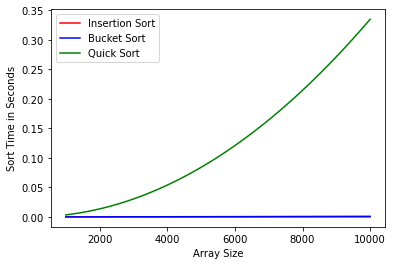

Bucket Sort:
            2
4.084e-12 x + 9.957e-08 x - 3.408e-07
Quick Sort:
            2
1.843e-12 x + 1.497e-07 x - 1.271e-05


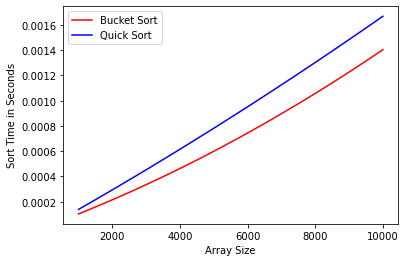

Bucket Sort:
           2
4.16e-12 x + 9.862e-08 x - 1.336e-06
Quick Sort:
            2
2.038e-12 x + 1.488e-07 x - 1.163e-05


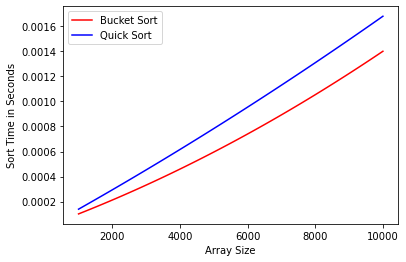

Bucket Sort:
            2
4.098e-12 x + 9.646e-08 x - 1.218e-06
Quick Sort:
            2
1.925e-12 x + 1.492e-07 x - 1.179e-05


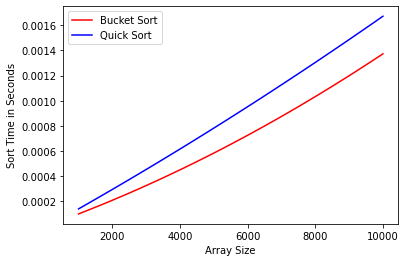

Bucket Sort:
            2
4.189e-12 x + 9.637e-08 x + 6.416e-07
Quick Sort:
            2
2.137e-12 x + 1.474e-07 x - 1.095e-05


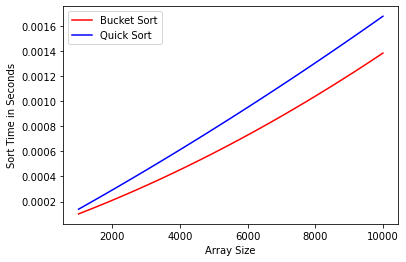

Bucket Sort:
            2
3.886e-12 x + 6.22e-08 x + 2.841e-06
Quick Sort:
            2
3.338e-09 x + 1.179e-07 x + 6.288e-06


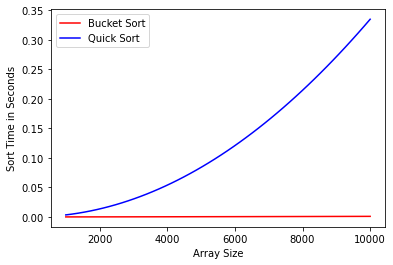

In [242]:
degree = 0
floor = 1000
ceil = 10000
while(degree <= 100):
    i = spec_data(data,2,ceil,degree)
    b = spec_data(data,3,ceil,degree)
    q = spec_data(data,8,ceil,degree)
    plot("Size", "Seconds", floor, ceil, i, b, q)
    degree += 25
degree = 0
while(degree <= 100):
    b = spec_data(data,3,ceil,degree)
    q = spec_data(data,8,ceil,degree)
    plot("Size", "Seconds", floor, ceil, b, q)
    degree += 25

## Base Alg, n < 100 000

Bucket Sort:
            2
4.072e-12 x + 9.967e-08 x - 4.606e-07
Quick Sort:
            2
3.993e-13 x + 1.644e-07 x - 2.86e-05


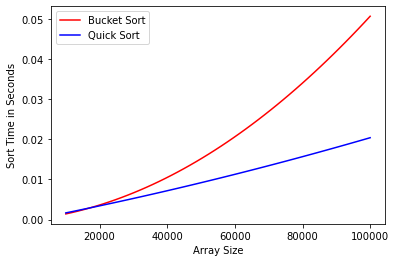

Bucket Sort:
            2
4.143e-12 x + 9.876e-08 x - 1.515e-06
Quick Sort:
            2
4.736e-13 x + 1.647e-07 x - 2.702e-05


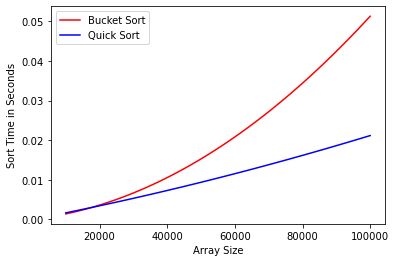

Bucket Sort:
            2
4.102e-12 x + 9.644e-08 x - 1.185e-06
Quick Sort:
            2
4.095e-13 x + 1.648e-07 x - 2.839e-05


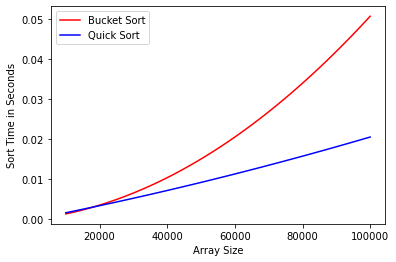

Bucket Sort:
            2
4.177e-12 x + 9.646e-08 x + 5.266e-07
Quick Sort:
           2
4.28e-13 x + 1.644e-07 x - 2.832e-05


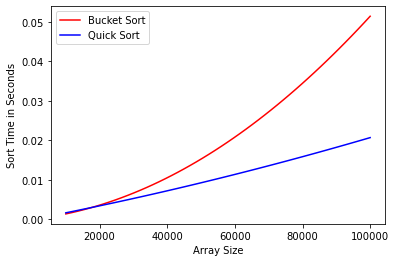

Bucket Sort:
            2
3.883e-12 x + 6.222e-08 x + 2.812e-06
Quick Sort:
            2
3.348e-09 x - 5.505e-08 x + 0.0002874


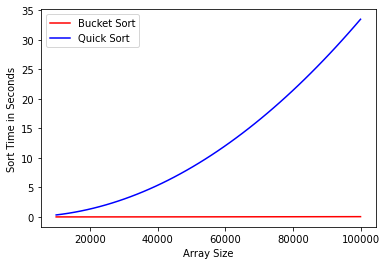

In [226]:
degree = 0
floor = 10000
ceil = 100000
while(degree <= 100):
    b = spec_data(data,3,ceil,degree)
    q = spec_data(data,8,ceil,degree)
    plot("Size", "Seconds", floor, ceil, b, q)
    degree += 25

## Improved Algo vs Base Algo, n < 1000 (old)

Hybrid Sort:
            2
1.721e-11 x + 1.094e-07 x - 1.791e-06
Quick Sort:
            2
1.775e-11 x + 1.162e-07 x - 4.056e-07


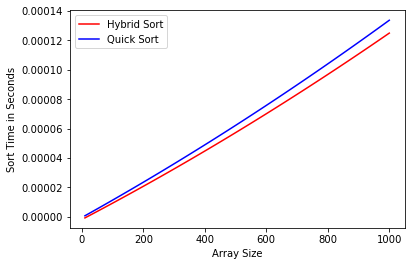

Hybrid Sort:
            2
1.411e-11 x + 1.108e-07 x - 1.911e-06
Quick Sort:
            2
1.688e-11 x + 1.177e-07 x - 6.975e-07


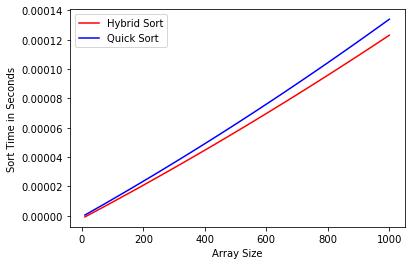

Hybrid Sort:
            2
1.623e-11 x + 1.089e-07 x - 1.677e-06
Quick Sort:
            2
1.902e-11 x + 1.158e-07 x - 2.621e-07


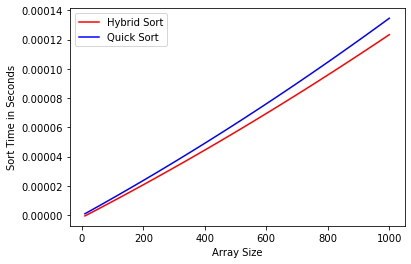

Hybrid Sort:
            2
1.556e-11 x + 1.068e-07 x - 1.735e-06
Quick Sort:
            2
2.258e-11 x + 1.128e-07 x + 6.106e-09


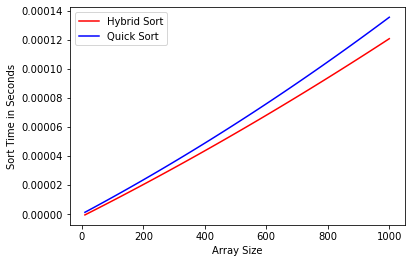

Hybrid Sort:
            2
3.171e-09 x + 2.023e-08 x - 4.956e-06
Quick Sort:
            2
3.443e-09 x + 4.886e-08 x + 3.126e-06


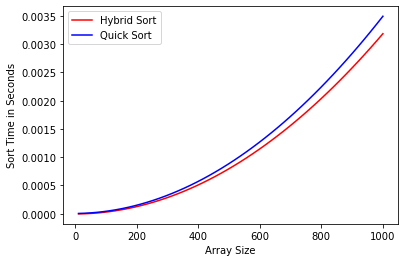

Modified Bucket Sort:
            2
1.786e-11 x + 1.657e-07 x + 5.702e-06
Bucket Sort:
             2
-3.328e-11 x + 1.328e-07 x + 2.246e-06


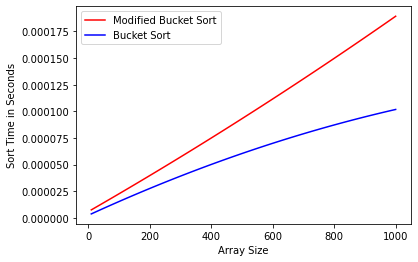

Modified Bucket Sort:
            2
1.259e-11 x + 1.715e-07 x + 5.647e-06
Bucket Sort:
             2
-3.697e-11 x + 1.335e-07 x + 2.131e-06


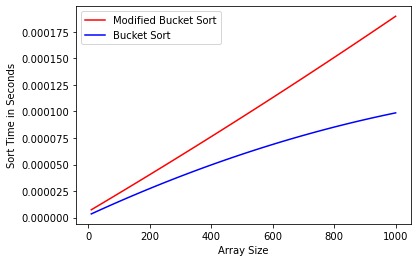

Modified Bucket Sort:
            2
1.569e-11 x + 1.694e-07 x + 5.963e-06
Bucket Sort:
             2
-3.241e-11 x + 1.294e-07 x + 2.17e-06


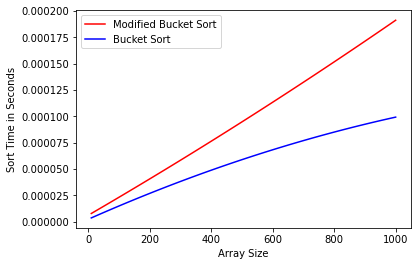

Modified Bucket Sort:
            2
2.361e-11 x + 1.715e-07 x + 6.164e-06
Bucket Sort:
             2
-3.788e-11 x + 1.353e-07 x + 1.799e-06


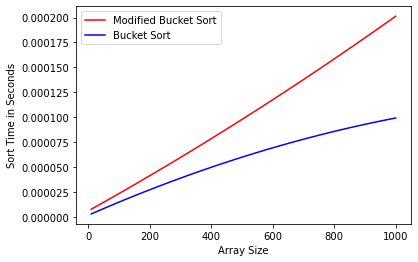

In [227]:
degree = 0
floor = 10
ceil = 1000
while(degree <= 100):
    h = spec_data(old_data,6,ceil,degree)
    q = spec_data(data,8,ceil,degree)
    plot("Size", "Seconds", floor, ceil, h, q)
    degree += 25
degree = 0
while(degree < 100):
    m = spec_data(old_data,7,ceil,degree)
    b = spec_data(data,3,ceil,degree)
    plot("Size", "Seconds", floor, ceil, m, b)
    degree += 25


## Improved Algo vs Base Algo, n < 10 000 (old)

Hybrid Sort:
            2
1.973e-12 x + 1.544e-07 x - 1.91e-05
Quick Sort:
            2
1.843e-12 x + 1.497e-07 x - 1.271e-05


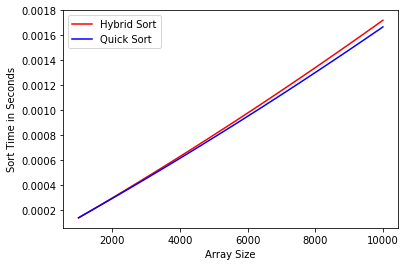

Hybrid Sort:
            2
1.959e-12 x + 1.552e-07 x - 1.963e-05
Quick Sort:
            2
2.038e-12 x + 1.488e-07 x - 1.163e-05


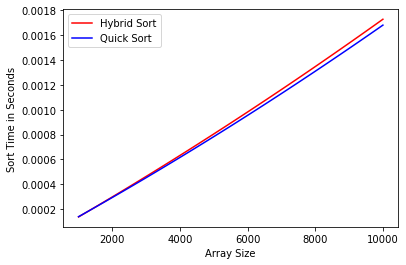

Hybrid Sort:
            2
2.173e-12 x + 1.508e-07 x - 1.725e-05
Quick Sort:
            2
1.925e-12 x + 1.492e-07 x - 1.179e-05


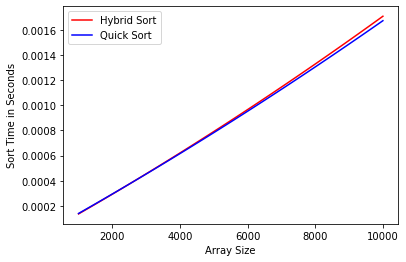

Hybrid Sort:
            2
1.703e-12 x + 1.564e-07 x - 2.167e-05
Quick Sort:
            2
2.137e-12 x + 1.474e-07 x - 1.095e-05


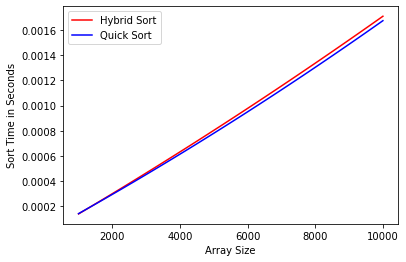

Hybrid Sort:
            2
3.386e-09 x + 1.847e-07 x - 0.0001592
Quick Sort:
            2
3.338e-09 x + 1.179e-07 x + 6.288e-06


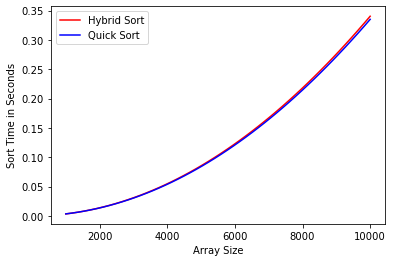

Modified Bucket Sort:
            2
6.332e-12 x + 1.776e-07 x + 8.074e-06
Bucket Sort:
            2
6.706e-12 x + 1.624e-07 x + 4.727e-05


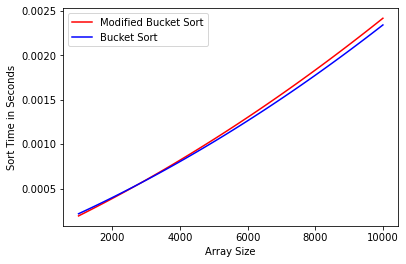

Modified Bucket Sort:
            2
6.312e-12 x + 1.768e-07 x + 9.742e-06
Bucket Sort:
            2
7.002e-12 x + 1.609e-07 x + 4.927e-05


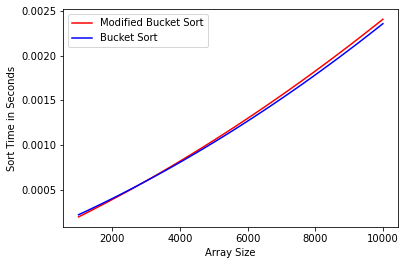

Modified Bucket Sort:
           2
6.35e-12 x + 1.813e-07 x + 7.866e-06
Bucket Sort:
            2
7.074e-12 x + 1.579e-07 x + 5.306e-05


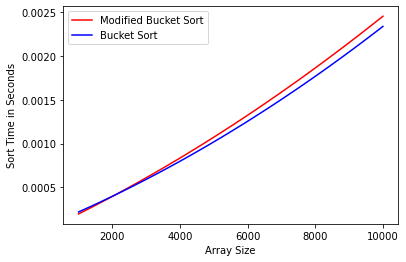

Modified Bucket Sort:
            2
6.324e-12 x + 1.8e-07 x + 1.145e-05
Bucket Sort:
            2
6.851e-12 x + 1.611e-07 x + 4.775e-05


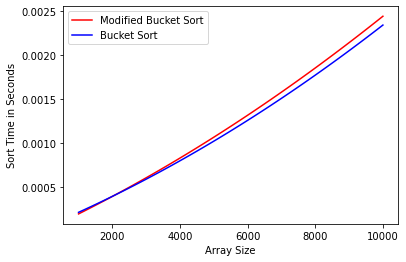

In [208]:
degree = 0
floor = 1000
ceil = 10000
while(degree <= 100):
    h = spec_data(old_data,6,ceil,degree)
    q = spec_data(data,8,ceil,degree)
    plot("Size", "Seconds", floor, ceil, h, q)
    degree += 25
degree = 0
while(degree < 100):
    m = spec_data(old_data,7,ceil,degree)
    b = spec_data(data,3,ceil,degree)
    plot("Size", "Seconds", floor, ceil, m, b)
    degree += 25

## Improved Algo vs Base Algo, n < 100 000 (old)

Hybrid Sort:
            2
3.883e-13 x + 1.697e-07 x - 3.358e-05
Quick Sort:
            2
3.993e-13 x + 1.644e-07 x - 2.86e-05


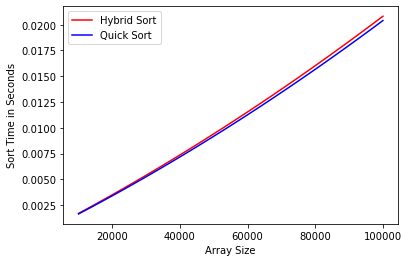

Hybrid Sort:
            2
3.228e-13 x + 1.708e-07 x - 3.476e-05
Quick Sort:
            2
4.736e-13 x + 1.647e-07 x - 2.702e-05


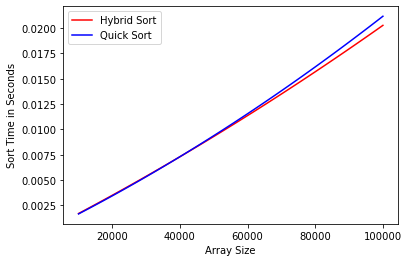

Hybrid Sort:
            2
3.586e-13 x + 1.682e-07 x - 3.437e-05
Quick Sort:
            2
4.095e-13 x + 1.648e-07 x - 2.839e-05


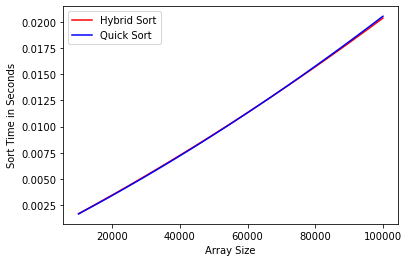

Hybrid Sort:
            2
4.171e-13 x + 1.688e-07 x - 3.368e-05
Quick Sort:
           2
4.28e-13 x + 1.644e-07 x - 2.832e-05


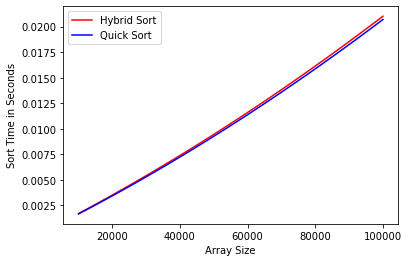

Hybrid Sort:
            2
3.326e-09 x + 6.474e-07 x - 0.0003877
Quick Sort:
            2
3.348e-09 x - 5.505e-08 x + 0.0002874


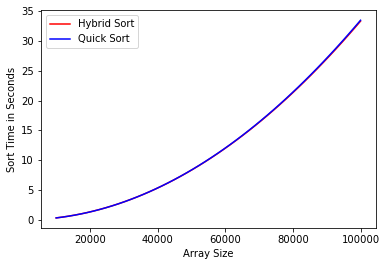

Modified Bucket Sort:
            2
1.522e-12 x + 2.31e-07 x - 5.183e-05
Bucket Sort:
            2
1.301e-12 x + 2.414e-07 x - 7.683e-05


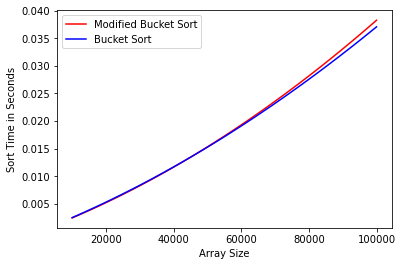

Modified Bucket Sort:
            2
1.345e-12 x + 2.32e-07 x - 5.237e-05
Bucket Sort:
            2
1.169e-12 x + 2.399e-07 x - 6.781e-05


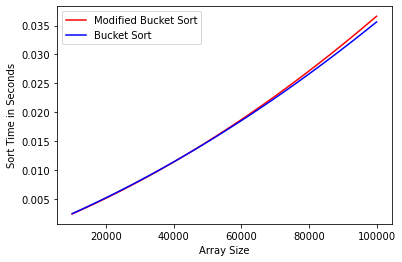

Modified Bucket Sort:
           2
1.55e-12 x + 2.363e-07 x - 5.634e-05
Bucket Sort:
            2
1.288e-12 x + 2.39e-07 x - 7.079e-05


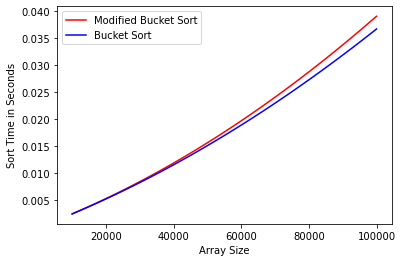

Modified Bucket Sort:
            2
1.451e-12 x + 2.371e-07 x - 5.789e-05
Bucket Sort:
            2
1.113e-12 x + 2.432e-07 x - 7.953e-05


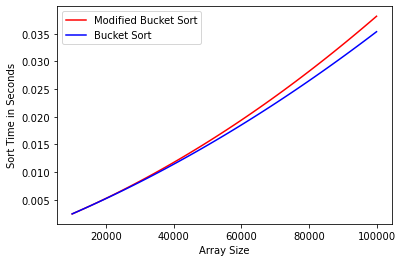

In [209]:
degree = 0
floor = 10000
ceil = 100000
while(degree <= 100):
    h = spec_data(old_data,6,ceil,degree)
    q = spec_data(data,8,ceil,degree)
    plot("Size", "Seconds", floor, ceil, h, q)
    degree += 25
degree = 0
while(degree < 100):
    m = spec_data(old_data,7,ceil,degree)
    b = spec_data(data,3,ceil,degree)
    plot("Size", "Seconds", floor, ceil, m, b)
    degree += 25

## Improved Algo vs Base Algo, n < 1000

Hybrid Sort:
            2
7.644e-12 x + 6.028e-08 x + 3.082e-06
Quick Sort:
            2
1.775e-11 x + 1.162e-07 x - 4.056e-07


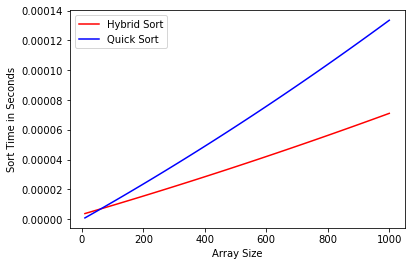

Hybrid Sort:
            2
1.124e-11 x + 5.77e-08 x + 3.106e-06
Quick Sort:
            2
1.688e-11 x + 1.177e-07 x - 6.975e-07


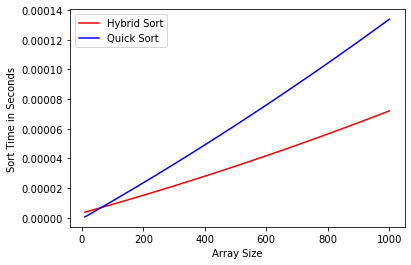

Hybrid Sort:
            2
1.287e-11 x + 5.467e-08 x + 3.215e-06
Quick Sort:
            2
1.902e-11 x + 1.158e-07 x - 2.621e-07


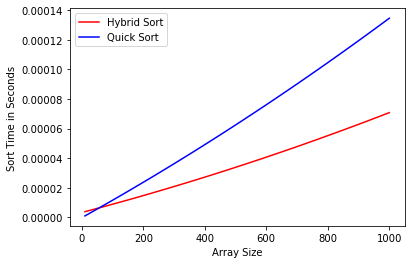

Hybrid Sort:
            2
8.827e-12 x + 6.153e-08 x + 3.216e-06
Quick Sort:
            2
2.258e-11 x + 1.128e-07 x + 6.106e-09


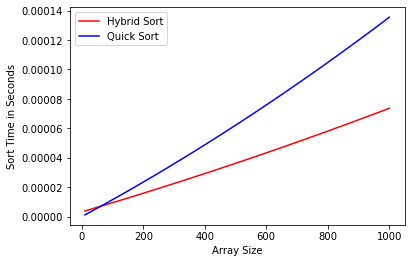

Hybrid Sort:
           2
3.65e-09 x - 9.321e-08 x - 1.913e-05
Quick Sort:
            2
3.443e-09 x + 4.886e-08 x + 3.126e-06


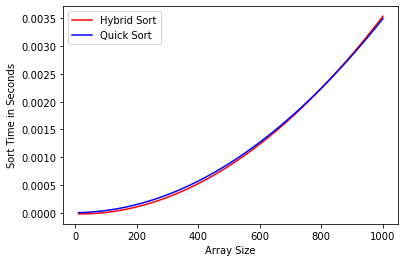

Modified Bucket Sort:
             2
-3.056e-12 x + 5.302e-08 x + 1.564e-06
Bucket Sort:
             2
-3.328e-11 x + 1.328e-07 x + 2.246e-06


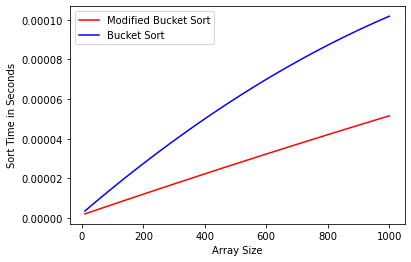

Modified Bucket Sort:
             2
-6.717e-12 x + 5.586e-08 x + 1.194e-06
Bucket Sort:
             2
-3.697e-11 x + 1.335e-07 x + 2.131e-06


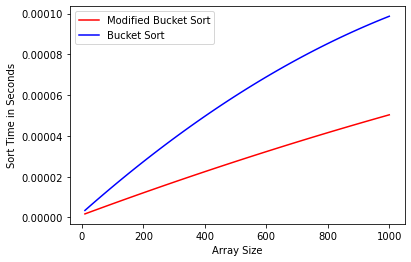

Modified Bucket Sort:
             2
-3.982e-12 x + 5.539e-08 x + 1.456e-06
Bucket Sort:
             2
-3.241e-11 x + 1.294e-07 x + 2.17e-06


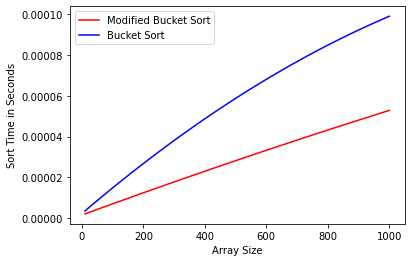

Modified Bucket Sort:
             2
-3.689e-12 x + 5.442e-08 x + 1.412e-06
Bucket Sort:
             2
-3.788e-11 x + 1.353e-07 x + 1.799e-06


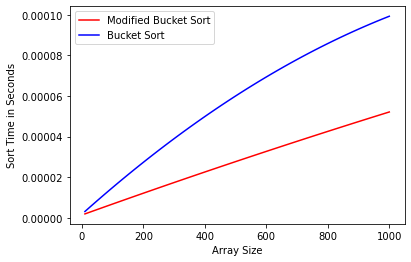

In [10]:
degree = 0
floor = 10
ceil = 1000
while(degree <= 100):
    h = spec_data(data,6,ceil,degree)
    q = spec_data(data,8,ceil,degree)
    plot("Size", "Seconds", floor, ceil, h, q)
    degree += 25
degree = 0
while(degree < 100):
    m = spec_data(data,7,ceil,degree)
    b = spec_data(data,3,ceil,degree)
    plot("Size", "Seconds", floor, ceil, m, b)
    degree += 25

## Improved Algo vs Base Algo, n < 10 000

Hybrid Sort:
            2
2.195e-12 x + 8.218e-08 x - 6.394e-06
Quick Sort:
            2
1.843e-12 x + 1.497e-07 x - 1.271e-05


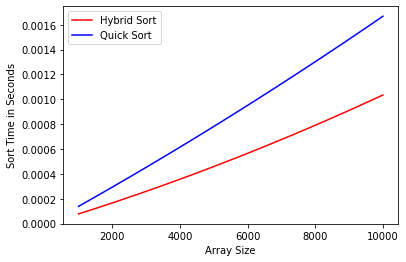

Hybrid Sort:
            2
2.277e-12 x + 8.303e-08 x - 7.06e-06
Quick Sort:
            2
2.038e-12 x + 1.488e-07 x - 1.163e-05


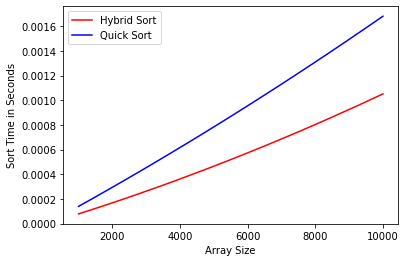

Hybrid Sort:
            2
2.169e-12 x + 8.642e-08 x - 9.561e-06
Quick Sort:
            2
1.925e-12 x + 1.492e-07 x - 1.179e-05


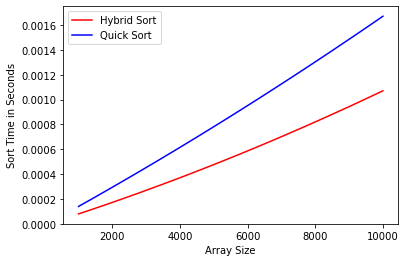

Hybrid Sort:
            2
2.162e-12 x + 8.112e-08 x - 5.151e-06
Quick Sort:
            2
2.137e-12 x + 1.474e-07 x - 1.095e-05


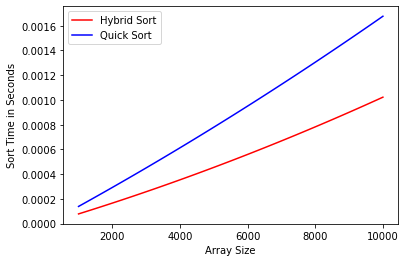

Hybrid Sort:
            2
3.349e-09 x + 1.069e-07 x - 1.162e-05
Quick Sort:
            2
3.338e-09 x + 1.179e-07 x + 6.288e-06


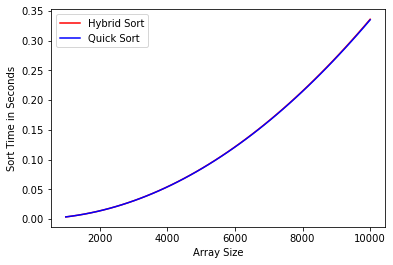

Modified Bucket Sort:
            2
3.278e-13 x + 2.411e-08 x + 1.319e-05
Bucket Sort:
            2
4.084e-12 x + 9.957e-08 x - 3.408e-07


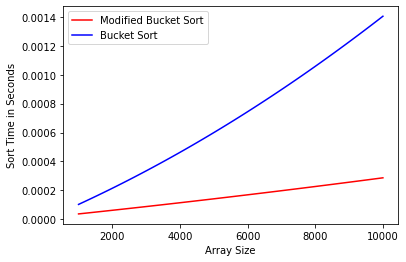

Modified Bucket Sort:
            2
2.414e-13 x + 2.497e-08 x + 1.261e-05
Bucket Sort:
           2
4.16e-12 x + 9.862e-08 x - 1.336e-06


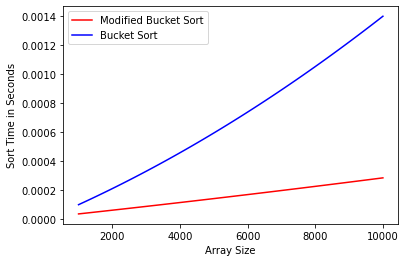

Modified Bucket Sort:
            2
1.976e-13 x + 2.507e-08 x + 1.328e-05
Bucket Sort:
            2
4.098e-12 x + 9.646e-08 x - 1.218e-06


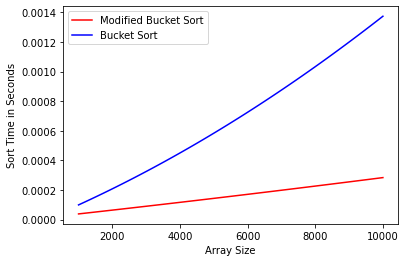

Modified Bucket Sort:
            2
3.901e-13 x + 2.273e-08 x + 1.436e-05
Bucket Sort:
            2
4.189e-12 x + 9.637e-08 x + 6.416e-07


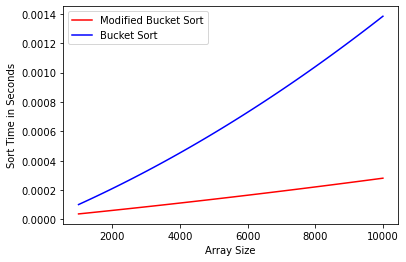

In [11]:
degree = 0
floor = 1000
ceil = 10000
while(degree <= 100):
    h = spec_data(data,6,ceil,degree)
    q = spec_data(data,8,ceil,degree)
    plot("Size", "Seconds", floor, ceil, h, q)
    degree += 25
degree = 0
while(degree < 100):
    m = spec_data(data,7,ceil,degree)
    b = spec_data(data,3,ceil,degree)
    plot("Size", "Seconds", floor, ceil, m, b)
    degree += 25

## Improved Algo vs Base Algo, n < 100 000

Hybrid Sort:
            2
4.359e-13 x + 9.908e-08 x - 2.262e-05
Quick Sort:
            2
3.993e-13 x + 1.644e-07 x - 2.86e-05


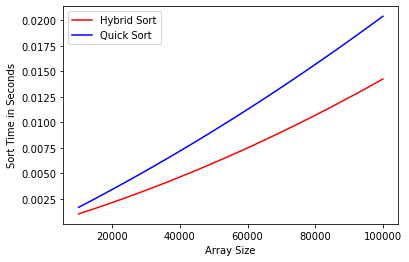

Hybrid Sort:
            2
4.134e-13 x + 1.006e-07 x - 2.301e-05
Quick Sort:
            2
4.736e-13 x + 1.647e-07 x - 2.702e-05


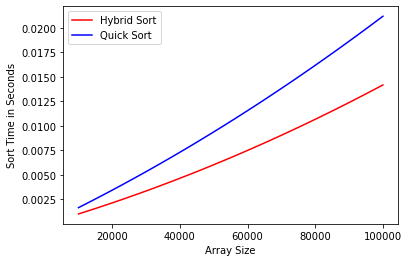

Hybrid Sort:
            2
3.924e-13 x + 1.036e-07 x - 2.634e-05
Quick Sort:
            2
4.095e-13 x + 1.648e-07 x - 2.839e-05


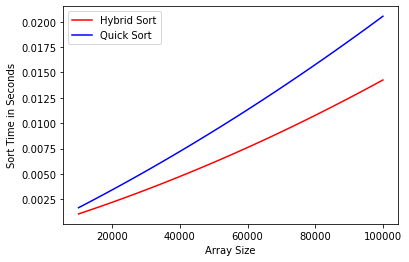

Hybrid Sort:
            2
3.875e-13 x + 9.863e-08 x - 2.252e-05
Quick Sort:
           2
4.28e-13 x + 1.644e-07 x - 2.832e-05


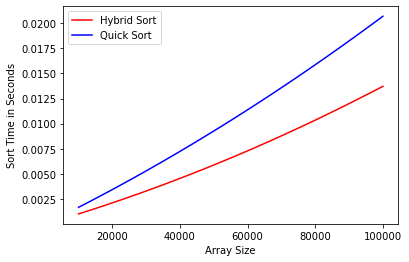

Hybrid Sort:
            2
3.349e-09 x + 1.031e-07 x - 8.773e-06
Quick Sort:
            2
3.348e-09 x - 5.505e-08 x + 0.0002874


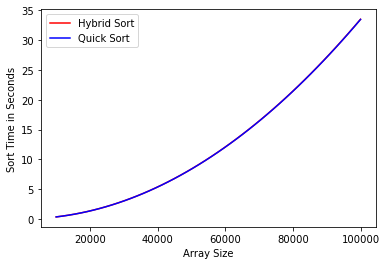

Modified Bucket Sort:
            2
2.781e-13 x + 3.108e-08 x - 2.699e-06
Bucket Sort:
            2
4.072e-12 x + 9.967e-08 x - 4.606e-07


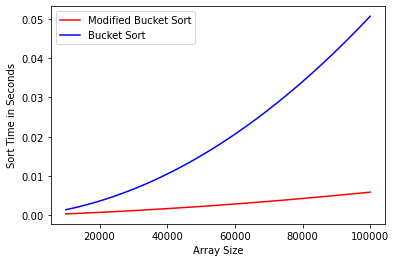

Modified Bucket Sort:
            2
2.688e-13 x + 3.113e-08 x - 1.908e-06
Bucket Sort:
            2
4.143e-12 x + 9.876e-08 x - 1.515e-06


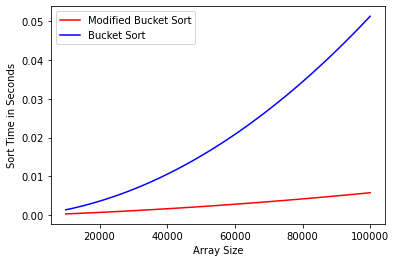

Modified Bucket Sort:
            2
2.592e-13 x + 3.119e-08 x - 1.578e-06
Bucket Sort:
            2
4.102e-12 x + 9.644e-08 x - 1.185e-06


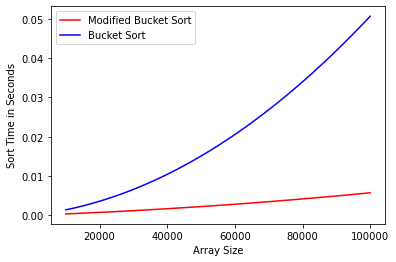

Modified Bucket Sort:
            2
2.705e-13 x + 3.012e-08 x - 1.38e-06
Bucket Sort:
            2
4.177e-12 x + 9.646e-08 x + 5.266e-07


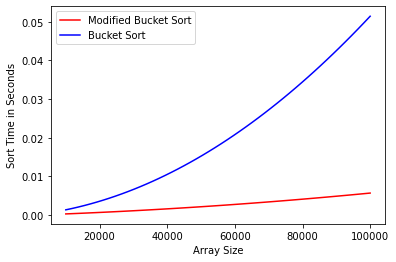

In [12]:
degree = 0
floor = 10000
ceil = 100000
while(degree <= 100):
    h = spec_data(data,6,ceil,degree)
    q = spec_data(data,8,ceil,degree)
    plot("Size", "Seconds", floor, ceil, h, q)
    degree += 25
degree = 0
while(degree < 100):
    m = spec_data(data,7,ceil,degree)
    b = spec_data(data,3,ceil,degree)
    plot("Size", "Seconds", floor, ceil, m, b)
    degree += 25

# All Improved Algorithm

Bucket Sort:
            2
4.084e-12 x + 9.957e-08 x - 3.408e-07
Quick Sort:
            2
1.843e-12 x + 1.497e-07 x - 1.271e-05
Hybrid Sort:
            2
2.195e-12 x + 8.218e-08 x - 6.394e-06
Modified Bucket Sort:
            2
3.278e-13 x + 2.411e-08 x + 1.319e-05


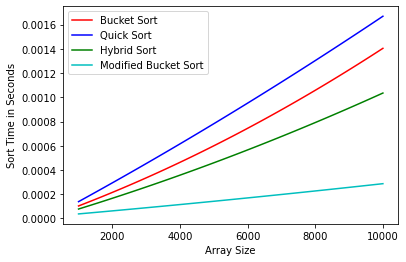

Bucket Sort:
           2
4.16e-12 x + 9.862e-08 x - 1.336e-06
Quick Sort:
            2
2.038e-12 x + 1.488e-07 x - 1.163e-05
Hybrid Sort:
            2
2.277e-12 x + 8.303e-08 x - 7.06e-06
Modified Bucket Sort:
            2
2.414e-13 x + 2.497e-08 x + 1.261e-05


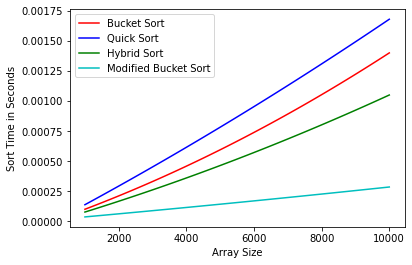

Bucket Sort:
            2
4.098e-12 x + 9.646e-08 x - 1.218e-06
Quick Sort:
            2
1.925e-12 x + 1.492e-07 x - 1.179e-05
Hybrid Sort:
            2
2.169e-12 x + 8.642e-08 x - 9.561e-06
Modified Bucket Sort:
            2
1.976e-13 x + 2.507e-08 x + 1.328e-05


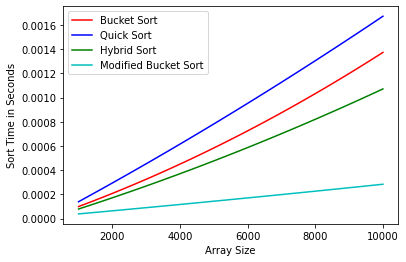

Bucket Sort:
            2
4.189e-12 x + 9.637e-08 x + 6.416e-07
Quick Sort:
            2
2.137e-12 x + 1.474e-07 x - 1.095e-05
Hybrid Sort:
            2
2.162e-12 x + 8.112e-08 x - 5.151e-06
Modified Bucket Sort:
            2
3.901e-13 x + 2.273e-08 x + 1.436e-05


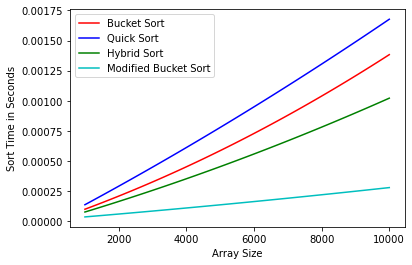

Bucket Sort:
            2
3.886e-12 x + 6.22e-08 x + 2.841e-06
Quick Sort:
            2
3.338e-09 x + 1.179e-07 x + 6.288e-06
Hybrid Sort:
            2
3.349e-09 x + 1.069e-07 x - 1.162e-05
Modified Bucket Sort:
            2
1.057e-13 x + 2.517e-08 x + 1.285e-05


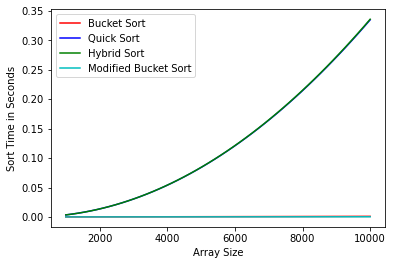

In [13]:
degree = 0
floor = 1000
ceil = 10000
while(degree <= 100):
    b = spec_data(data,3,ceil,degree)
    q = spec_data(data,8,ceil,degree)
    h = spec_data(data,6,ceil,degree)
    m = spec_data(data,7,ceil,degree)
    plot("Size", "Seconds", floor, ceil,b,q,h, m)
    degree += 25

## Degree vs Time Graphs

Insertion Sort:
             2
-3.974e-07 x + 2.949e-05 x + 0.02202


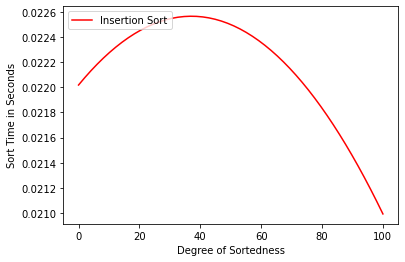

Bucket Sort:
             2
-6.761e-09 x + 7.238e-07 x + 0.001097


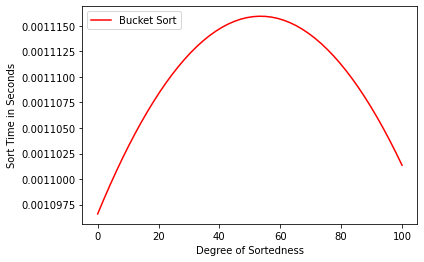

Quick Sort:
            2
3.281e-06 x - 0.0002602 x + 0.003983


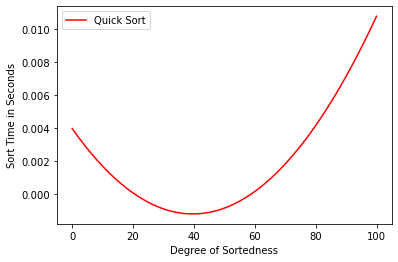

Hybrid Sort:
            2
1.156e-08 x - 1.123e-06 x + 0.0004963


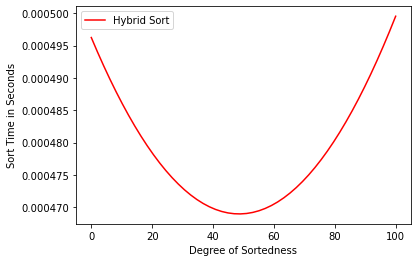

Modified Bucket Sort:
            2
3.708e-09 x - 3.483e-07 x + 0.0002827


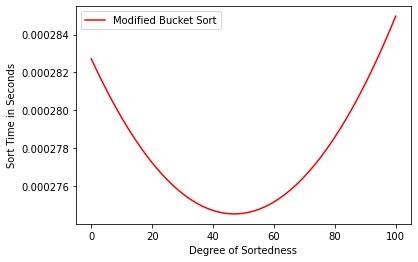

In [14]:
for algo in all:
    i = deg_data[deg_data["Algorithm"]==algo]
    plot("Percent_Sort", "Seconds", 0, 100, i)

# Data Training for Optimal Size (ML)

In [18]:
ins= create_df("isvqs.csv")
cutoff = {
    "Degrees of Sortedness": [i for i in range(0,100)],
    "Intersection Points": []
}
i = ins[ins["Algorithm"]==2]
q = ins[ins["Algorithm"]==8]
for j in range(0,100):
    ideg = i[i["Percent_Sort"]==j]
    qdeg = q[q["Percent_Sort"]==j]

    x,y = (ideg["Size"].values, ideg["Seconds"].values)
    x1,y1 = (qdeg["Size"].values, qdeg["Seconds"].values)

    line = np.poly1d(np.polyfit(x,y,2))
    line1 = np.poly1d(np.polyfit(x1,y1,2))

    result = findIntersection(line,line1,100)[0]

    if isinstance(result,str):
        cutoff["Degrees of Sortedness"].remove(j)
    else:
        cutoff["Intersection Points"].append(result)

            5             4            3          2
-1.695e-07 x + 4.314e-05 x - 0.004026 x + 0.1635 x - 2.553 x + 129.9


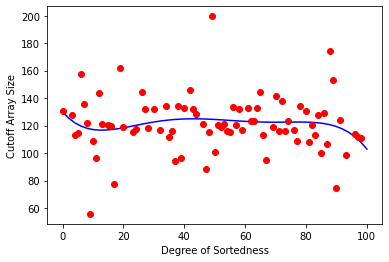

In [20]:
from sklearn.linear_model import Ridge
cut_df = pd.DataFrame(data=cutoff)


"""X = cut_df.drop("Intersection Points", axis=1)
y = cut_df.loc[:,"Intersection Points"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

reg = Ridge()
reg.fit(X_train, y_train)
print("R^2 Score =", reg.score(X_train, y_train))"""

x_plot,y_plot = (cut_df["Degrees of Sortedness"].values, cut_df["Intersection Points"].values)

line = np.poly1d(np.polyfit(x_plot,y_plot,5))
myline = np.linspace(0,100)
plt.xlabel("Degree of Sortedness")
plt.ylabel("Cutoff Array Size")
plt.plot(myline , line(myline), "b", label="f(x)")
print(line)
plt.plot(x_plot,y_plot,"ro")
plt.show()